# General explanation
Building neural networks with TensorFlow, without Keras for MNIST data.
MNIST contains 55000 images of digit 0...9. The task is to build a model that predict digit for a given image.
Each image in MNIST is 28x28x1 mean 28 pixels width, 28 pixels heigh and 1 color channel, - gray

# Load and see some examples

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [9]:
print("MNIST object overview:\n", mnist)
print('='*50)
print("Train set shape:\n", mnist.train.images.shape)
print('='*50)
print("Test set shape:\n", mnist.test.images.shape)

MNIST object overview:
 Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0748531ef0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0748531fd0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0748535208>)
Train set shape:
 (55000, 784)
Test set shape:
 (10000, 784)


### Samples

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

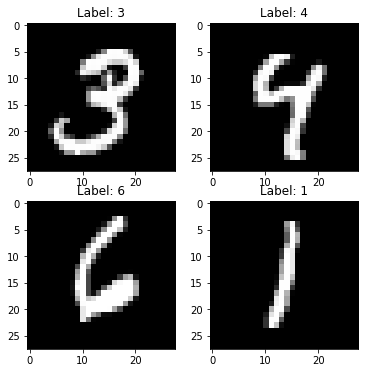

In [29]:
sample_indices = [1,2,3,4]
train_samples = mnist.train.images[sample_indices]
labes_samples = mnist.train.labels[sample_indices]
plt.figure(figsize=[6,6])
for i in range(len(sample_indices)):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%labes_samples[i].argmax(axis=-1))
    plt.imshow(train_samples[i].reshape([28,28]), cmap='gray')

# MultiLayer Perceptron

In [46]:
# setup environment
import tensorflow as tf
sess = tf.InteractiveSession()

# initialize variables
sess.run(tf.global_variables_initializer())

/home/hung/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [161]:
# input layer
x = tf.placeholder(tf.float32, shape=[None, 784])
# None means we do not define how many batch size

# Weight and bias matrices for fist summator with 200 units
W12 = tf.Variable(tf.random_normal([784, 200]))
b1 = tf.Variable(tf.zeros([200]))

# initialize variables for W12 & b1
sess.run(tf.global_variables_initializer())

# first summator
Z1 = tf.matmul(x, W12) + b1

# First activator with ReLU function
A1 = tf.nn.relu(Z1)

# Weight and bias matrices for second summator with 10 units
W23 = tf.Variable(tf.random_uniform([200, 10]))
b2 = tf.Variable(tf.zeros([10]))

# initialize variables for W23 & b2
sess.run(tf.global_variables_initializer())

# second summator
Z2 = tf.matmul(A1, W23) + b2

# secon activator with sigmoid function
A2 = tf.nn.sigmoid(Z2)

# labels
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [162]:
# Z2.eval(feed_dict={x: mnist.train.images})

In [163]:
# loss function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=A2)
)

In [164]:
# model training aim
train_step = tf.train.GradientDescentOptimizer(0.1)\
                     .minimize(cross_entropy)

In [165]:
# run the training
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [160]:
# Evaluate the Model
correct_prediction = tf.equal(tf.argmax(A2,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
# was 0.9189

0.098
